In [2]:
## MAC: On your .ipynb, import this plotting_style by adding in and uncommenting the following lines:
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/michael/Dropbox/AION/Projects')  # Replace with the relevant path that contains this script
from plotting_style_arial import set_plotting_style_arial
set_plotting_style_arial()


import matplotlib.pyplot as plt

print('Initialising plotting style...')

def set_plotting_style():
    plt.rc("font", family = 'Arial', size=10)
    plt.rc('axes', labelsize=20, titlesize = 20, labelpad=5)
    plt.rc('xtick', labelsize=18)
    plt.rc('ytick', labelsize=18)
    plt.rc('legend', fontsize=15)

print('Success! Plotting style initialised.')

Initialising arial plotting style...
Success! Arial plotting style initialised.
Initialising plotting style...
Success! Plotting style initialised.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

### Where does 133, 200, 2100 come from?

133kHz is from 2MHz/30datapoints*2(DPAOM) = 133kHz

200kHz is from 2MHz/20datapoints*2(DPAOM) = 200kHz

2100 is the conversion factor given the zeeman splitting equation where energy separation i.e. frequency separation is given by:

$\Delta E = \mu_B m_l g_J B = (1400kHz/G)*(1)*1.5*B \rightarrow B [G] = \Delta E / 2100kHz$

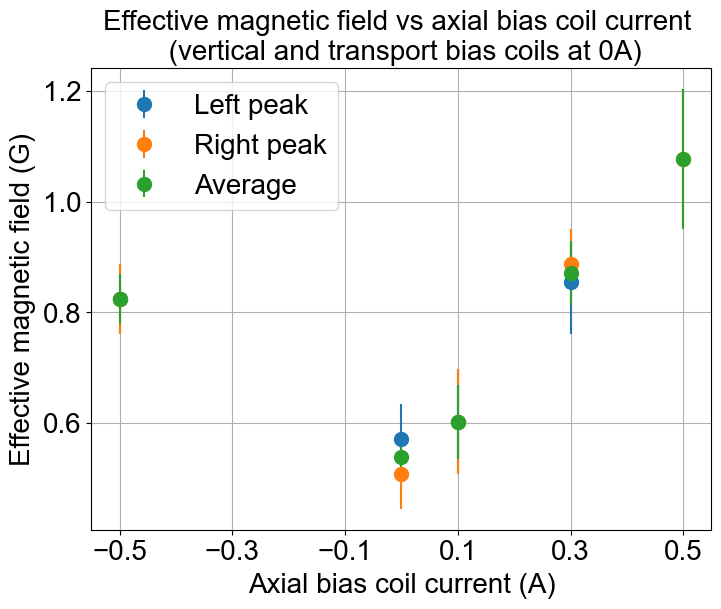

In [4]:
### First (rightmost) plot, where axial bias coil is varied

current_axial_biascoil = [0,-0.5,0.1,0.3,0.5]
axial_left_peak_freq_separation_from_centre = [i * 133/2100 for i in [9,13,9.5,13.5,np.nan]] #133kHz per point (e.g. 9 means 9*133kHz)
axial_right_peak_freq_separation_from_centre = [i * 133/2100 for i in [8,13,9.5,14,17]] #133kHz per point (e.g. 9 means 9*133kHz)
axial_left_peak_freq_separation_from_centre_error = [i * 133/2100 for i in [1.0,1.0,1.5,1.5,1.0]] #error bar where one data point is +-133kHz
axial_right_peak_freq_separation_from_centre_error = [i * 133/2100 for i in [1.0,1.0,1.5,1.0,2.0]] #error bar where one data point is +-133kHz
axial_average_peak_freq_separation_from_centre = [(i+j)/2 for i,j in zip(axial_left_peak_freq_separation_from_centre,axial_right_peak_freq_separation_from_centre)][:-1] + [axial_right_peak_freq_separation_from_centre[-1]] #average of left and right peak
axial_average_peak_freq_separation_from_centre_error = [np.sqrt(i**2+j**2)/2 for i,j in zip(axial_left_peak_freq_separation_from_centre_error,axial_right_peak_freq_separation_from_centre_error)][:-1] + [axial_right_peak_freq_separation_from_centre_error[-1]] #error of average of left and right peak

fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.errorbar(current_axial_biascoil, axial_left_peak_freq_separation_from_centre, yerr=axial_left_peak_freq_separation_from_centre_error, fmt='o', markersize=10, label='Left peak')
ax.errorbar(current_axial_biascoil, axial_right_peak_freq_separation_from_centre, yerr=axial_right_peak_freq_separation_from_centre_error, fmt='o', markersize=10, label='Right peak')
ax.errorbar(current_axial_biascoil, axial_average_peak_freq_separation_from_centre, yerr=axial_average_peak_freq_separation_from_centre_error, fmt='o', markersize=10, label='Average')
ax.set_xlabel('Axial bias coil current (A)',fontsize=20)
ax.set_ylabel('Effective magnetic field (G)',fontsize=20)
ax.set_title('Effective magnetic field vs axial bias coil current \n (vertical and transport bias coils at 0A)')
ax.set_xticks(np.linspace(-0.5,0.5,6))
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)
ax.legend(loc='upper left',fontsize=20)
ax.grid()


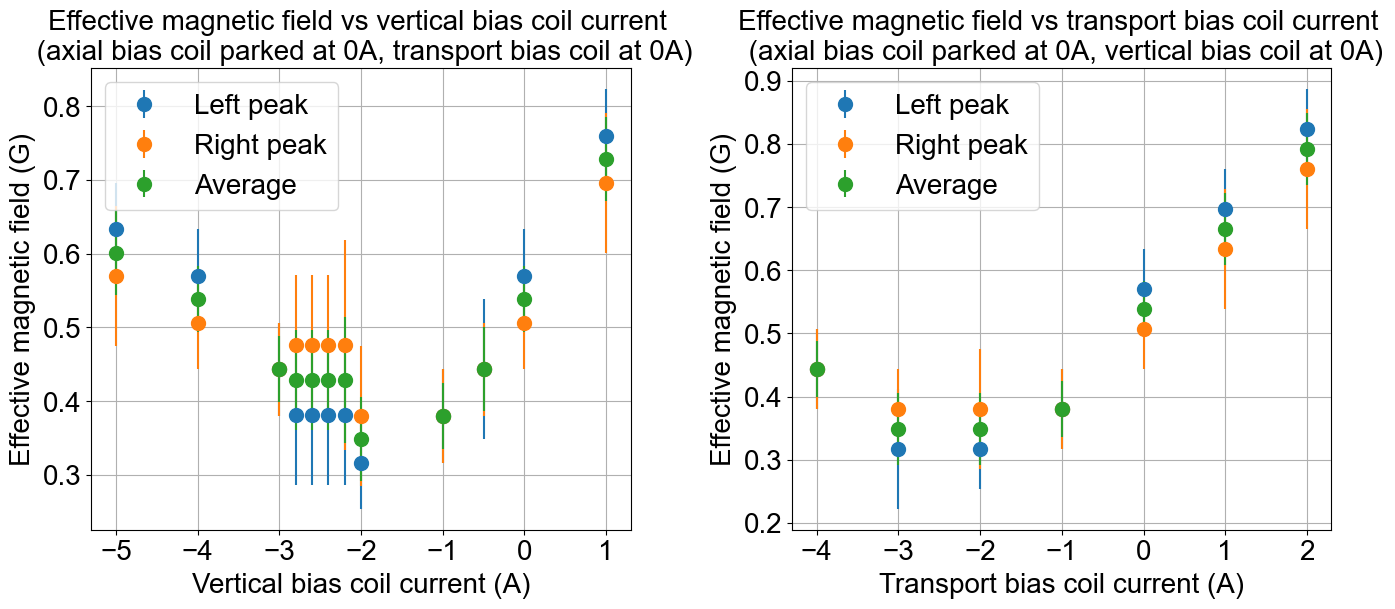

In [5]:
# second (middle) plot, where axial is parked at 0A, then vertical bias coil is varied (transport bias coils still at 0A) - choice 1

current_vertical_biascoil_axial0 = [0,1,-0.5,-1,-2,-3,-4,-5,-2.2,-2.4,-2.6,-2.8]
vertical_left_peak_freq_separation_from_centre_axial0 = [i * 133/2100 for i in [9,12,7,6,5,7,9,10]] + [i * 200/2100 for i in [4,4,4,4]] #133kHz per point (e.g. 9 means 9*133kHz) and 200kHz per point (e.g. 4 means 4*200kHz)
vertical_right_peak_freq_separation_from_centre_axial0 = [i * 133/2100 for i in [8,11,7,6,6,7,8,9]] + [i * 200/2100 for i in [5,5,5,5]] #133kHz per point (e.g. 9 means 9*133kHz) and 200kHz per point (e.g. 4 means 4*200kHz)
vertical_left_peak_freq_separation_from_centre_error_axial0 = [i * 133/2100 for i in [1.0,1.0,1.5,1.0,1.0,1.0,1.0,1.0]] + [i * 200/2100 for i in [1.0,1.0,1.0,1.0]] #error bar where one data point is +-133kHz and 200kHz
vertical_right_peak_freq_separation_from_centre_error_axial0 = [i * 133/2100 for i in [1.0,1.5,1.0,1.0,1.5,1.0,1.0,1.5]] + [i * 200/2100 for i in [1.5,1.0,1.0,1.0]] #error bar where one data point is +-133kHz and 200kHz
vertical_average_peak_freq_separation_from_centre_axial0 = [(i+j)/2 for i,j in zip(vertical_left_peak_freq_separation_from_centre_axial0,vertical_right_peak_freq_separation_from_centre_axial0)] #average of left and right peak
vertical_average_peak_freq_separation_from_centre_error_axial0 = [np.sqrt(i**2+j**2)/2 for i,j in zip(vertical_left_peak_freq_separation_from_centre_error_axial0,vertical_right_peak_freq_separation_from_centre_error_axial0)] #error of average of left and right peak

# second (middle) plot, where axial is parked at 0A, then transport bias coil is varied (vertical bias coils still at 0A) - choice 2

current_transport_biascoil_axial0 = [0,1,2,-1,-2,-3,-4]
transport_left_peak_freq_separation_from_centre_axial0 = [i * 133/2100 for i in [9,11,13,6,5,5,7]] #133kHz per point (e.g. 9 means 9*133kHz)
transport_right_peak_freq_separation_from_centre_axial0 = [i * 133/2100 for i in [8,10,12,6,6,6,7]] #133kHz per point (e.g. 9 means 9*133kHz)
transport_left_peak_freq_separation_from_centre_error_axial0 = [i * 133/2100 for i in [1.0,1.0,1.0,1.0,1.0,1.5,1.0]] #error bar where one data point is +-133kHz
transport_right_peak_freq_separation_from_centre_error_axial0 = [i * 133/2100 for i in [1.0,1.5,1.5,1.0,1.5,1.0,1.0]] #error bar where one data point is +-133kHz
transport_average_peak_freq_separation_from_centre_axial0 = [(i+j)/2 for i,j in zip(transport_left_peak_freq_separation_from_centre_axial0,transport_right_peak_freq_separation_from_centre_axial0)] #average of left and right peak
transport_average_peak_freq_separation_from_centre_error_axial0 = [np.sqrt(i**2+j**2)/2 for i,j in zip(transport_left_peak_freq_separation_from_centre_error_axial0,transport_right_peak_freq_separation_from_centre_error_axial0)] #error of average of left and right peak


fig, ax = plt.subplots(1,2,figsize=(16,6))
ax[0].errorbar(current_vertical_biascoil_axial0, vertical_left_peak_freq_separation_from_centre_axial0, yerr=vertical_left_peak_freq_separation_from_centre_error_axial0, fmt='o', markersize=10, label='Left peak')
ax[0].errorbar(current_vertical_biascoil_axial0, vertical_right_peak_freq_separation_from_centre_axial0, yerr=vertical_right_peak_freq_separation_from_centre_error_axial0, fmt='o', markersize=10, label='Right peak')
ax[0].errorbar(current_vertical_biascoil_axial0, vertical_average_peak_freq_separation_from_centre_axial0, yerr=vertical_average_peak_freq_separation_from_centre_error_axial0, fmt='o', markersize=10, label='Average')
ax[0].set_xlabel('Vertical bias coil current (A)',fontsize=20)
ax[0].set_ylabel('Effective magnetic field (G)',fontsize=20)
ax[0].set_title('Effective magnetic field vs vertical bias coil current \n (axial bias coil parked at 0A, transport bias coil at 0A)')
ax[0].set_xticks(np.linspace(-5,1,7))
ax[0].tick_params(axis='y', which='major', labelsize=20)
ax[0].tick_params(axis='x', which='major', labelsize=20)
ax[0].legend(loc='upper left',fontsize=20)
ax[0].grid()

ax[1].errorbar(current_transport_biascoil_axial0, transport_left_peak_freq_separation_from_centre_axial0, yerr=transport_left_peak_freq_separation_from_centre_error_axial0, fmt='o', markersize=10, label='Left peak')
ax[1].errorbar(current_transport_biascoil_axial0, transport_right_peak_freq_separation_from_centre_axial0, yerr=transport_right_peak_freq_separation_from_centre_error_axial0, fmt='o', markersize=10, label='Right peak')
ax[1].errorbar(current_transport_biascoil_axial0, transport_average_peak_freq_separation_from_centre_axial0, yerr=transport_average_peak_freq_separation_from_centre_error_axial0, fmt='o', markersize=10, label='Average')
ax[1].set_xlabel('Transport bias coil current (A)',fontsize=20)
ax[1].set_ylabel('Effective magnetic field (G)',fontsize=20)
ax[1].set_title('Effective magnetic field vs transport bias coil current \n (axial bias coil parked at 0A, vertical bias coil at 0A)')
ax[1].set_xticks(np.linspace(-4,2,7))
ax[1].tick_params(axis='y', which='major', labelsize=20)
ax[1].tick_params(axis='x', which='major', labelsize=20)
ax[1].legend(loc='upper left',fontsize=20)
ax[1].grid()

# separate the two plots by a bit of distance
# plt.tight_layout()
plt.subplots_adjust(wspace=0.3)


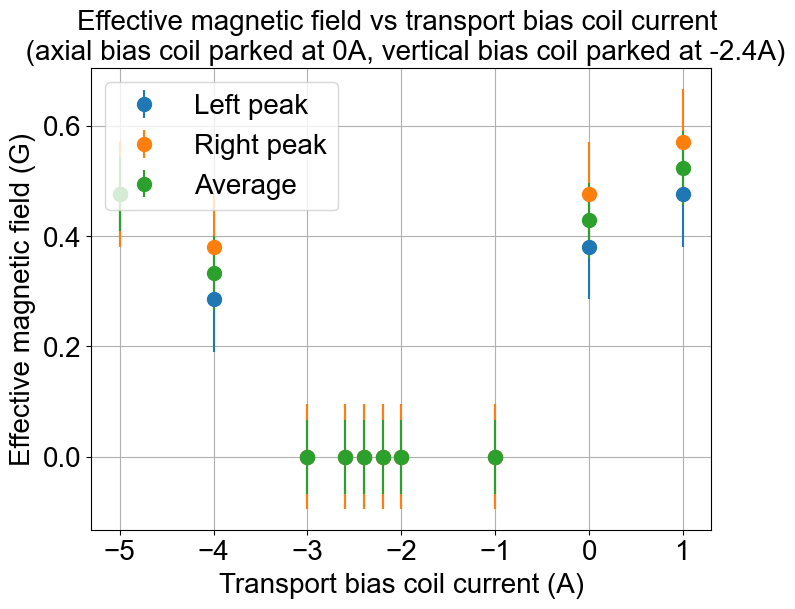

In [6]:
# third (leftmost) & final plot, where now axial is parked at 0A, vertical is parked at -2.4A, then transport bias coil is varied

current_transport_biascoil_axial0_verticalminus2pt4 = [0,1,-1,-2,-2.2,-2.4,-2.6,-3,-4,-5]
transport_left_peak_freq_separation_from_centre_axial0_verticalminus2pt4 = [i * 200/2100 for i in [4,5,0,0,0,0,0,0,3,5]] #200kHz per point (e.g. 4 means 4*200kHz)
transport_right_peak_freq_separation_from_centre_axial0_verticalminus2pt4 = [i * 200/2100 for i in [5,6,0,0,0,0,0,0,4,5]] #200kHz per point (e.g. 4 means 4*200kHz)
transport_left_peak_freq_separation_from_centre_error_axial0_verticalminus2pt4 = [i * 200/2100 for i in [1,1,1,1,1,1,1,1,1,1]] #error bar where one data point is +-200kHz
transport_right_peak_freq_separation_from_centre_error_axial0_verticalminus2pt4 = [i * 200/2100 for i in [1,1,1,1,1,1,1,1,1,1]] #error bar where one data point is +-200kHz
transport_average_peak_freq_separation_from_centre_axial0_verticalminus2pt4 = [(i+j)/2 for i,j in zip(transport_left_peak_freq_separation_from_centre_axial0_verticalminus2pt4,transport_right_peak_freq_separation_from_centre_axial0_verticalminus2pt4)] #average of left and right peak
transport_average_peak_freq_separation_from_centre_error_axial0_verticalminus2pt4 = [np.sqrt(i**2+j**2)/2 for i,j in zip(transport_left_peak_freq_separation_from_centre_error_axial0_verticalminus2pt4,transport_right_peak_freq_separation_from_centre_error_axial0_verticalminus2pt4)] #error of average of left and right peak

fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.errorbar(current_transport_biascoil_axial0_verticalminus2pt4, transport_left_peak_freq_separation_from_centre_axial0_verticalminus2pt4, yerr=transport_left_peak_freq_separation_from_centre_error_axial0_verticalminus2pt4, fmt='o', markersize=10, label='Left peak')
ax.errorbar(current_transport_biascoil_axial0_verticalminus2pt4, transport_right_peak_freq_separation_from_centre_axial0_verticalminus2pt4, yerr=transport_right_peak_freq_separation_from_centre_error_axial0_verticalminus2pt4, fmt='o', markersize=10, label='Right peak')
ax.errorbar(current_transport_biascoil_axial0_verticalminus2pt4, transport_average_peak_freq_separation_from_centre_axial0_verticalminus2pt4, yerr=transport_average_peak_freq_separation_from_centre_error_axial0_verticalminus2pt4, fmt='o', markersize=10, label='Average')
ax.set_xlabel('Transport bias coil current (A)',fontsize=20)
ax.set_ylabel('Effective magnetic field (G)',fontsize=20)
ax.set_title('Effective magnetic field vs transport bias coil current \n (axial bias coil parked at 0A, vertical bias coil parked at -2.4A)')
ax.set_xticks(np.linspace(-5,1,7))
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)
ax.legend(loc='upper left',fontsize=20)
ax.grid()


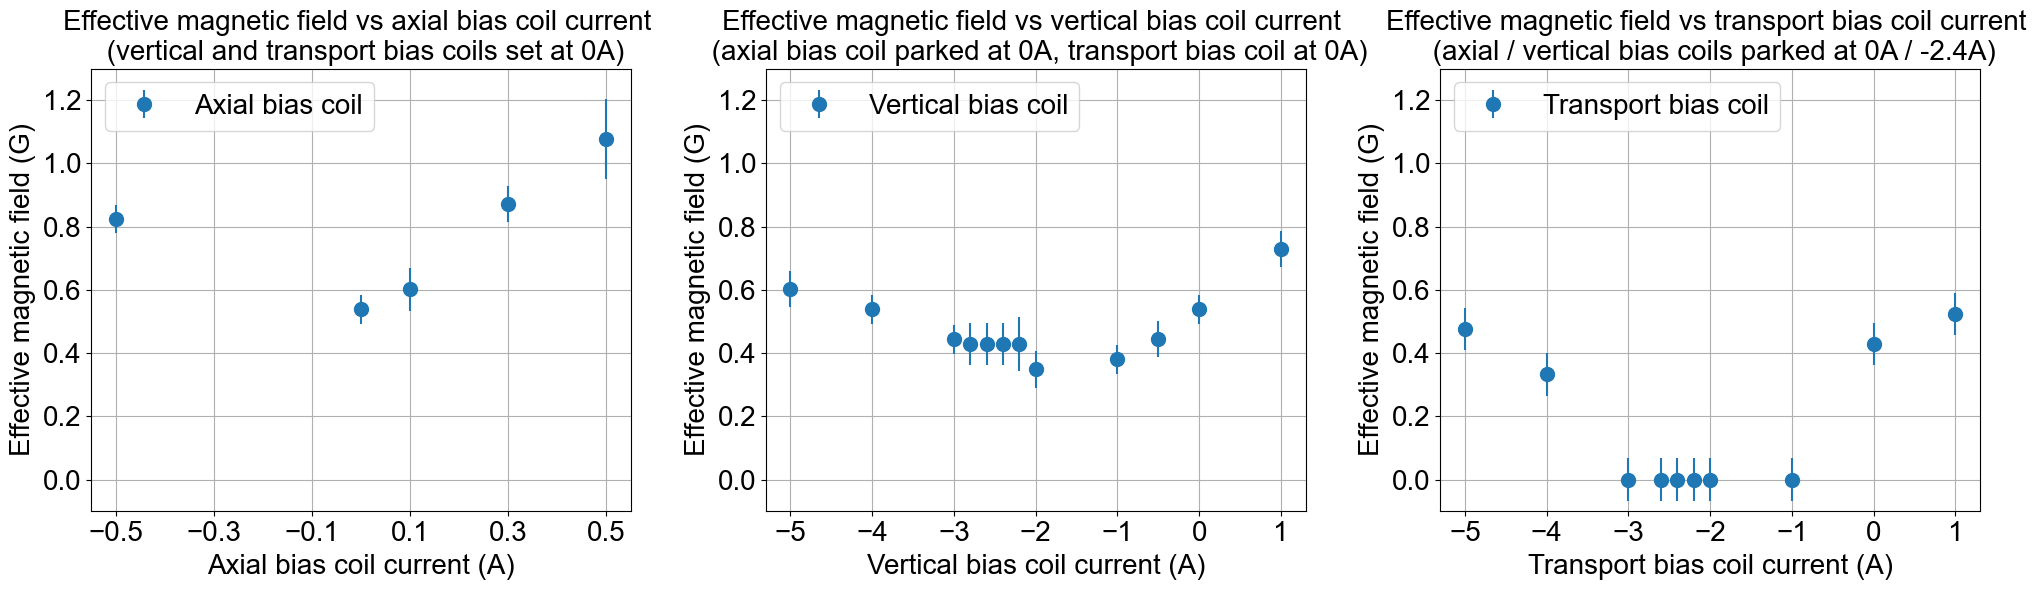

In [7]:
# now we plot everything together in a single figure with 3 subplots in one row, choosing option 1 for the middle plot
# we also want to make sure that the y axis is the same for all to compare
# we only need to use the average plot and not the left and right peak plots

fig, ax = plt.subplots(1,3,figsize=(20,6))
ax[0].errorbar(current_axial_biascoil, axial_average_peak_freq_separation_from_centre, yerr=axial_average_peak_freq_separation_from_centre_error, fmt='o', markersize=10, label='Axial bias coil')
ax[0].set_xlabel('Axial bias coil current (A)',fontsize=20)
ax[0].set_ylabel('Effective magnetic field (G)',fontsize=20)
ax[0].set_title('Effective magnetic field vs axial bias coil current \n (vertical and transport bias coils set at 0A)')
ax[0].set_xticks(np.linspace(-0.5,0.5,6))
ax[0].tick_params(axis='y', which='major', labelsize=20)
ax[0].tick_params(axis='x', which='major', labelsize=20)
ax[0].legend(loc='upper left',fontsize=20)
ax[0].grid()

ax[1].errorbar(current_vertical_biascoil_axial0, vertical_average_peak_freq_separation_from_centre_axial0, yerr=vertical_average_peak_freq_separation_from_centre_error_axial0, fmt='o', markersize=10, label='Vertical bias coil')
ax[1].set_xlabel('Vertical bias coil current (A)',fontsize=20)
ax[1].set_ylabel('Effective magnetic field (G)',fontsize=20)
ax[1].set_title('Effective magnetic field vs vertical bias coil current \n (axial bias coil parked at 0A, transport bias coil at 0A)')
ax[1].set_xticks(np.linspace(-5,1,7))
ax[1].tick_params(axis='y', which='major', labelsize=20)
ax[1].tick_params(axis='x', which='major', labelsize=20)
ax[1].legend(loc='upper left',fontsize=20)
ax[1].grid()

# I will skip choice 2 in the middle plot, move on to the final third plot

ax[2].errorbar(current_transport_biascoil_axial0_verticalminus2pt4, transport_average_peak_freq_separation_from_centre_axial0_verticalminus2pt4, yerr=transport_average_peak_freq_separation_from_centre_error_axial0_verticalminus2pt4, fmt='o', markersize=10, label='Transport bias coil')
ax[2].set_xlabel('Transport bias coil current (A)',fontsize=20)
ax[2].set_ylabel('Effective magnetic field (G)',fontsize=20)
ax[2].set_title('Effective magnetic field vs transport bias coil current \n (axial / vertical bias coils parked at 0A / -2.4A)')
ax[2].set_xticks(np.linspace(-5,1,7))
ax[2].tick_params(axis='y', which='major', labelsize=20)
ax[2].tick_params(axis='x', which='major', labelsize=20)
ax[2].legend(loc='upper left',fontsize=20)
ax[2].grid()

# make sure that the y axis is the same for all plots
ax[0].set_ylim(-0.1,1.3)
ax[1].set_ylim(-0.1,1.3)
ax[2].set_ylim(-0.1,1.3)

# separate the two plots by a bit of distance
plt.tight_layout()
plt.subplots_adjust(wspace=0.25)


The parameters are: beta_axial = 1.66 G/A
The Bo_transport value is 0.37 G
The Bo_axial value is 0.18 G
The Bo_vertical value is 0.35 G
The parameters with errors are:
beta_axial = 1.66 +/- 0.18 G/A
Bo_transport = 0.37 +/- 2796600.47 G
Bo_axial = 0.18 +/- 0.05 G
Bo_vertical = 0.35 +/- 2980704.68 G


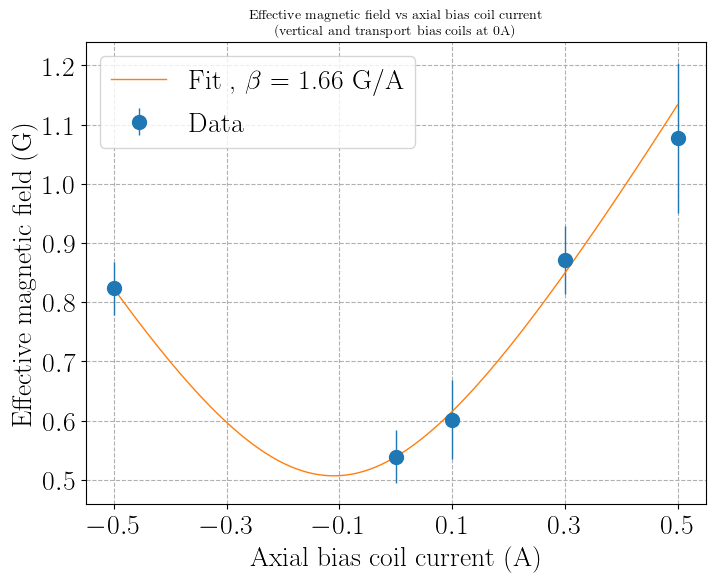

In [63]:
# fit the average axial data to the function 

def effective_bfield_function_axial(I_axial,beta_axial,Bo_transport,Bo_axial,Bo_vertical):
    '''
    Bo_x,Bo_y,Bo_z: background stray b field without bias coil
    beta_x,beta_y,beta_z: magnetic field gradient
    I: current in the axial bias coil
    '''
    return np.sqrt((Bo_transport)**2 + (Bo_axial+beta_axial*I_axial)**2 + (Bo_vertical)**2)

# fit the first graph (axial bias coil) to the function and only use the average data

from scipy.optimize import curve_fit
popt_axial, pcov_axial = curve_fit(effective_bfield_function_axial, current_axial_biascoil, axial_average_peak_freq_separation_from_centre, sigma=axial_average_peak_freq_separation_from_centre_error, absolute_sigma=True)

# now plot the fit on the graph and print the parameters

fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.errorbar(current_axial_biascoil, axial_average_peak_freq_separation_from_centre, yerr=axial_average_peak_freq_separation_from_centre_error, fmt='o', markersize=10, label='Data')
ax.plot(np.linspace(-0.5,0.5,100), effective_bfield_function_axial(np.linspace(-0.5,0.5,100),*popt_axial), label=r'Fit , $\beta$ = {:.2f} G/A'.format(popt_axial[0]))
ax.set_xlabel('Axial bias coil current (A)',fontsize=20)
ax.set_ylabel('Effective magnetic field (G)',fontsize=20)
ax.set_title('Effective magnetic field vs axial bias coil current \n (vertical and transport bias coils at 0A)')
ax.set_xticks(np.linspace(-0.5,0.5,6))
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)
ax.legend(loc='upper left',fontsize=20)
ax.grid()

# print all the parameters
print('The parameters are: beta_axial = {:.2f} G/A'.format(popt_axial[0]))
print('The Bo_transport value is {:.2f} G'.format(popt_axial[1]))
print('The Bo_axial value is {:.2f} G'.format(popt_axial[2]))
print('The Bo_vertical value is {:.2f} G'.format(popt_axial[3]))

# print all the parameters above with their errors based on their covariance


print('The parameters with errors are:')
print('beta_axial = {:.2f} +/- {:.2f} G/A'.format(popt_axial[0],np.sqrt(pcov_axial[0][0])))
print('Bo_transport = {:.2f} +/- {:.2f} G'.format(popt_axial[1],np.sqrt(pcov_axial[1][1])))
print('Bo_axial = {:.2f} +/- {:.2f} G'.format(popt_axial[2],np.sqrt(pcov_axial[2][2])))
print('Bo_vertical = {:.2f} +/- {:.2f} G'.format(popt_axial[3],np.sqrt(pcov_axial[3][3])))

The parameters are: bet_vertical = 0.18 G/A
The Bo_transport value is 0.38 G
The Bo_vertical value is 0.37 G
The parameters with errors are:
beta_vertical = 0.18 +/- 0.02 G/A
Bo_transport = 0.38 +/- 0.02 G
Bo_vertical = 0.37 +/- 0.04 G


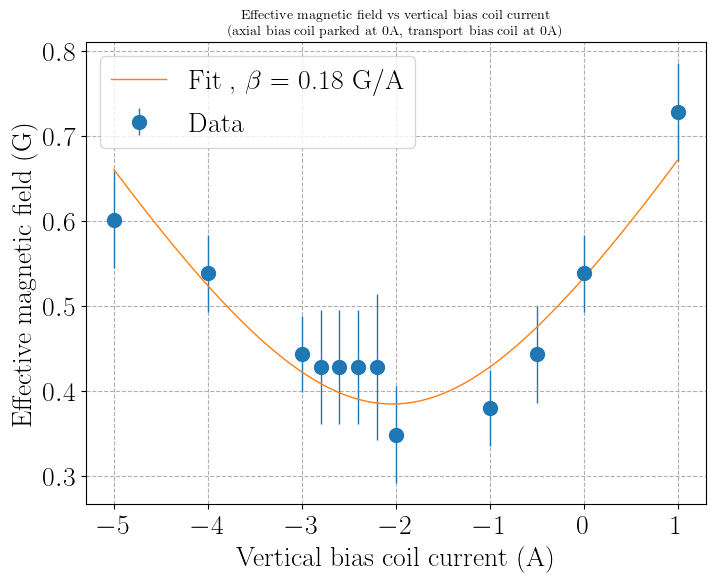

In [15]:
# fit the second plot which is the vertical bias coil (where axial is parked at zero) to a new function now

def effective_bfield_function_vertical(I_vertical,beta_vertical,Bo_transport,Bo_vertical):
    '''
    Bo_x,Bo_y,Bo_z: background stray b field without bias coil
    beta_x,beta_y,beta_z: magnetic field gradient
    I: current in the vertical bias coil
    Key difference: axial is effectively cancelled by axial coils so that means the bias coils compesnate the stray Bo_axial
    '''
    return np.sqrt((Bo_transport)**2 + (Bo_vertical+beta_vertical*I_vertical)**2)

# fit the second graph (vertical bias coil) to the function and only use the average data

popt_vertical, pcov_vertical = curve_fit(effective_bfield_function_vertical, current_vertical_biascoil_axial0, vertical_average_peak_freq_separation_from_centre_axial0, sigma=vertical_average_peak_freq_separation_from_centre_error_axial0, absolute_sigma=True)

# now plot the fit on the graph and print the parameters

fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.errorbar(current_vertical_biascoil_axial0, vertical_average_peak_freq_separation_from_centre_axial0, yerr=vertical_average_peak_freq_separation_from_centre_error_axial0, fmt='o', markersize=10, label='Data')
ax.plot(np.linspace(-5,1,100), effective_bfield_function_vertical(np.linspace(-5,1,100),*popt_vertical), label=r'Fit , $\beta$ = {:.2f} G/A'.format(popt_vertical[0]))
ax.set_xlabel('Vertical bias coil current (A)',fontsize=20)
ax.set_ylabel('Effective magnetic field (G)',fontsize=20)
ax.set_title('Effective magnetic field vs vertical bias coil current \n (axial bias coil parked at 0A, transport bias coil at 0A)')
ax.set_xticks(np.linspace(-5,1,7))
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)
ax.legend(loc='upper left',fontsize=20)
ax.grid()

# print all the parameters
print('The parameters are: bet_vertical = {:.2f} G/A'.format(popt_vertical[0]))
print('The Bo_transport value is {:.2f} G'.format(popt_vertical[1]))
print('The Bo_vertical value is {:.2f} G'.format(popt_vertical[2]))

# print all the parameters above with their errors based on their covariance
print('The parameters with errors are:')
print('beta_vertical = {:.2f} +/- {:.2f} G/A'.format(popt_vertical[0],np.sqrt(pcov_vertical[0][0])))
print('Bo_transport = {:.2f} +/- {:.2f} G'.format(popt_vertical[1],np.sqrt(pcov_vertical[1][1])))
print('Bo_vertical = {:.2f} +/- {:.2f} G'.format(popt_vertical[2],np.sqrt(pcov_vertical[2][2])))


The parameters are: beta_transport = 0.16 G/A
The Bo_transport value is 0.35 G
The parameters with errors are:
beta_transport = 0.16 +/- 0.01 G/A
Bo_transport = 0.35 +/- 0.03 G


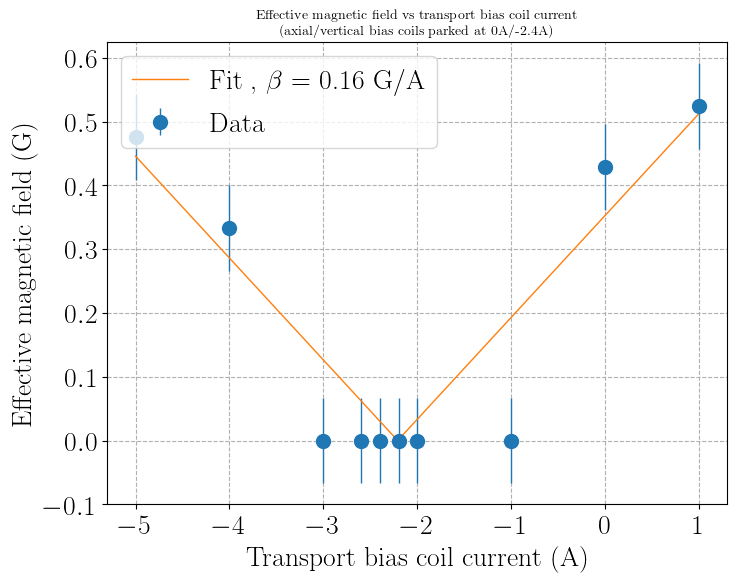

In [16]:
# now, finally, fit the final third plot (transport bias coil) to a new function

def effective_bfield_function_transport(I_transport,beta_transport,Bo_transport):
    '''
    Bo_x,Bo_y,Bo_z: background stray b field without bias coil
    beta_x,beta_y,beta_z: magnetic field gradient
    I: current in the transport bias coil
    Key difference: axial and vertical are effectively cancelled by axial and vertical coils so that means the bias coils compesnate the stray Bo_axial and Bo_vertical
    '''
    return np.sqrt((Bo_transport+beta_transport*I_transport)**2)

# fit the third graph (transport bias coil) to the function and only use the average data

popt_transport, pcov_transport = curve_fit(effective_bfield_function_transport, current_transport_biascoil_axial0_verticalminus2pt4, transport_average_peak_freq_separation_from_centre_axial0_verticalminus2pt4, sigma=transport_average_peak_freq_separation_from_centre_error_axial0_verticalminus2pt4, absolute_sigma=True)

# now plot the fit on the graph and print the parameters

fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.errorbar(current_transport_biascoil_axial0_verticalminus2pt4, transport_average_peak_freq_separation_from_centre_axial0_verticalminus2pt4, yerr=transport_average_peak_freq_separation_from_centre_error_axial0_verticalminus2pt4, fmt='o', markersize=10, label='Data')
ax.plot(np.linspace(-5,1,100), effective_bfield_function_transport(np.linspace(-5,1,100),*popt_transport), label=r'Fit , $\beta$ = {:.2f} G/A'.format(popt_transport[0]))
ax.set_xlabel('Transport bias coil current (A)',fontsize=20)
ax.set_ylabel('Effective magnetic field (G)',fontsize=20)
ax.set_title('Effective magnetic field vs transport bias coil current \n (axial/vertical bias coils parked at 0A/-2.4A)')
ax.set_xticks(np.linspace(-5,1,7))
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)
ax.legend(loc='upper left',fontsize=20)
ax.grid()

# print all the parameters
print('The parameters are: beta_transport = {:.2f} G/A'.format(popt_transport[0]))
print('The Bo_transport value is {:.2f} G'.format(popt_transport[1]))

# print all the parameters above with their errors based on their covariance
print('The parameters with errors are:')
print('beta_transport = {:.2f} +/- {:.2f} G/A'.format(popt_transport[0],np.sqrt(pcov_transport[0][0])))
print('Bo_transport = {:.2f} +/- {:.2f} G'.format(popt_transport[1],np.sqrt(pcov_transport[1][1])))


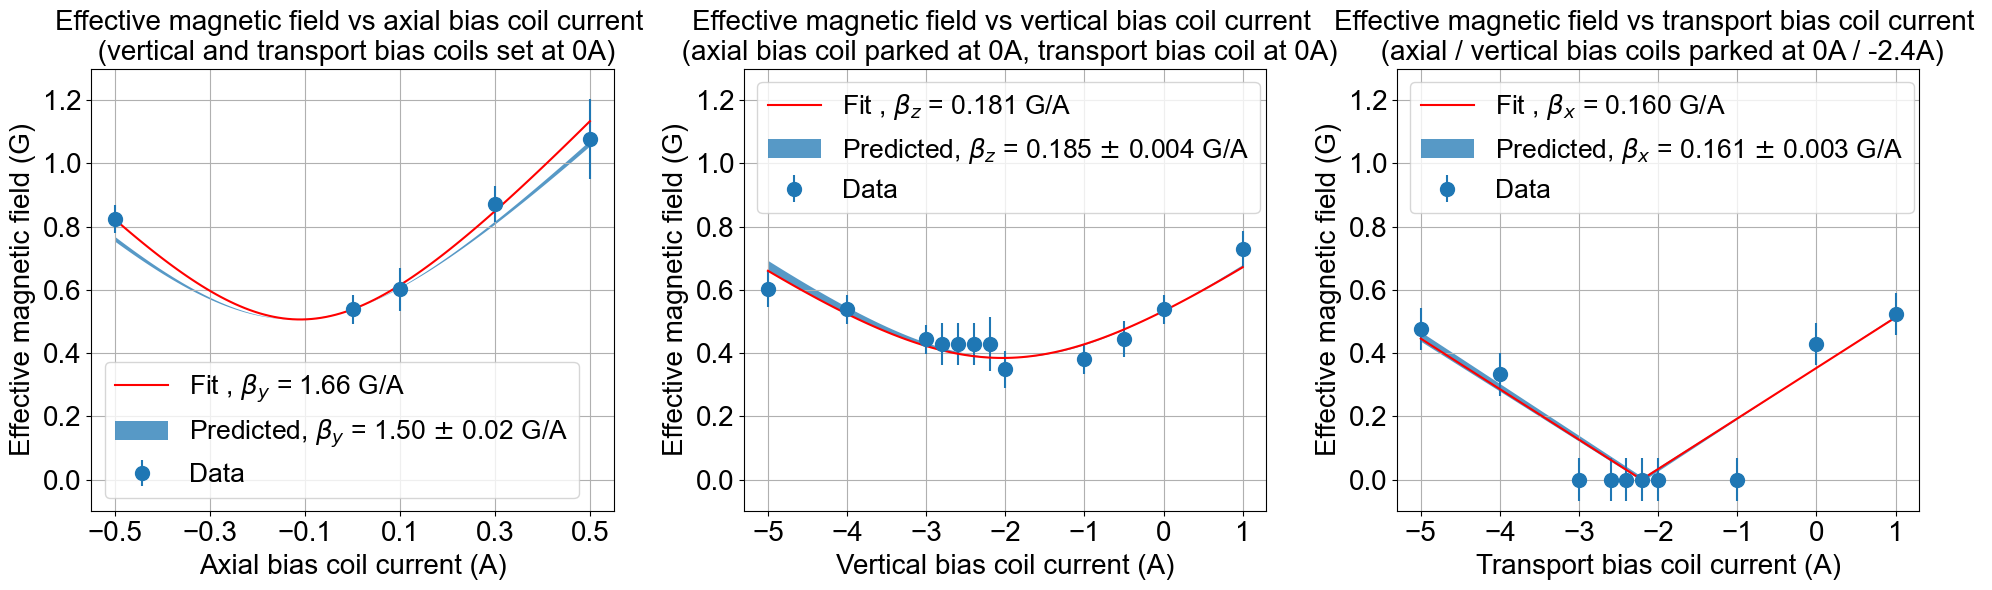

In [11]:
# now we combine all the fits into a single figure
# including the fits, the data, and the fit parameters
# we can just use the variables popt_axial, popt_vertical, popt_transport defined earlier

fig, ax = plt.subplots(1,3,figsize=(20,6))
ax[0].errorbar(current_axial_biascoil, axial_average_peak_freq_separation_from_centre, yerr=axial_average_peak_freq_separation_from_centre_error, fmt='o', markersize=10, label='Data')
ax[0].plot(np.linspace(-0.5,0.5,100), effective_bfield_function_axial(np.linspace(-0.5,0.5,100),*popt_axial), label=r'Fit , $\beta_y$ = {:.2f} G/A'.format(popt_axial[0]), color='red')
ax[0].set_xlabel('Axial bias coil current (A)',fontsize=20)
ax[0].set_ylabel('Effective magnetic field (G)',fontsize=20)
ax[0].set_title('Effective magnetic field vs axial bias coil current \n (vertical and transport bias coils set at 0A)')
ax[0].set_xticks(np.linspace(-0.5,0.5,6))
ax[0].tick_params(axis='y', which='major', labelsize=20)
ax[0].tick_params(axis='x', which='major', labelsize=20)


ax[1].errorbar(current_vertical_biascoil_axial0, vertical_average_peak_freq_separation_from_centre_axial0, yerr=vertical_average_peak_freq_separation_from_centre_error_axial0, fmt='o', markersize=10, label='Data')
ax[1].plot(np.linspace(-5,1,100), effective_bfield_function_vertical(np.linspace(-5,1,100),*popt_vertical), label=r'Fit , $\beta_z$ = {:.3f} G/A'.format(popt_vertical[0]), color='red')
ax[1].set_xlabel('Vertical bias coil current (A)',fontsize=20)
ax[1].set_ylabel('Effective magnetic field (G)',fontsize=20)
ax[1].set_title('Effective magnetic field vs vertical bias coil current \n (axial bias coil parked at 0A, transport bias coil at 0A)')
ax[1].set_xticks(np.linspace(-5,1,7))
ax[1].tick_params(axis='y', which='major', labelsize=20)
ax[1].tick_params(axis='x', which='major', labelsize=20)

ax[2].errorbar(current_transport_biascoil_axial0_verticalminus2pt4, transport_average_peak_freq_separation_from_centre_axial0_verticalminus2pt4, yerr=transport_average_peak_freq_separation_from_centre_error_axial0_verticalminus2pt4, fmt='o', markersize=10, label='Data')
ax[2].plot(np.linspace(-5,1,100), effective_bfield_function_transport(np.linspace(-5,1,100),*popt_transport), label=r'Fit , $\beta_x$ = {:.3f} G/A'.format(popt_transport[0]), color='red')
ax[2].set_xlabel('Transport bias coil current (A)',fontsize=20)
ax[2].set_ylabel('Effective magnetic field (G)',fontsize=20)
ax[2].set_title('Effective magnetic field vs transport bias coil current \n (axial / vertical bias coils parked at 0A / -2.4A)')
ax[2].set_xticks(np.linspace(-5,1,7))
ax[2].tick_params(axis='y', which='major', labelsize=20)
ax[2].tick_params(axis='x', which='major', labelsize=20)


# make sure the y axis is the same for all plots
ax[0].set_ylim(-0.1,1.3)
ax[1].set_ylim(-0.1,1.3)
ax[2].set_ylim(-0.1,1.3)

# I also have hall probe measurements that give predictions to the effective magnetic field, and i want to add another plots to all three plots with the hall probe values that i have
# I want the predicted plots to have a upper lower bound using the uncertainties in the hall probe measurements
# I will use the same function as the fits, but now with the hall probe values and their uncertainties

# hall probe values and their uncertainties
hall_probe_beta_axial = 1.50
hall_probe_beta_axial_uncertainty = 0.02
hall_probe_beta_vertical = 0.185
hall_probe_beta_vertical_uncertainty = 0.004
hall_probe_beta_transport = 0.161
hall_probe_beta_transport_uncertainty = 0.003

# now, with these values above, we can predict the effective magnetic field using the function we defined earlier
# we will use the np linspace to plot a predicted curve using the function and the hall probe values
# we want to plot the confidence interval of the hall probe values as well
hall_probe_axial_predicted_upper = effective_bfield_function_axial(np.linspace(-0.5,0.5,100),hall_probe_beta_axial+hall_probe_beta_axial_uncertainty,popt_axial[1],popt_axial[2],popt_axial[3])
hall_probe_axial_predicted_lower = effective_bfield_function_axial(np.linspace(-0.5,0.5,100),hall_probe_beta_axial-hall_probe_beta_axial_uncertainty,popt_axial[1],popt_axial[2],popt_axial[3])
hall_probe_vertical_predicted_upper = effective_bfield_function_vertical(np.linspace(-5,1,100),hall_probe_beta_vertical+hall_probe_beta_vertical_uncertainty,popt_vertical[1],popt_vertical[2])
hall_probe_vertical_predicted_lower = effective_bfield_function_vertical(np.linspace(-5,1,100),hall_probe_beta_vertical-hall_probe_beta_vertical_uncertainty,popt_vertical[1],popt_vertical[2])
hall_probe_transport_predicted_upper = effective_bfield_function_transport(np.linspace(-5,1,100),hall_probe_beta_transport+hall_probe_beta_transport_uncertainty,popt_transport[1])
hall_probe_transport_predicted_lower = effective_bfield_function_transport(np.linspace(-5,1,100),hall_probe_beta_transport-hall_probe_beta_transport_uncertainty,popt_transport[1])

# now we plot the hall probe values on the same graph as the fits and the data with a confidence interval band plot via plt.fill_between
# we will also add the hall probe values to the legend, calling it predicted
# we will just directly add the plots to the existing plots here

ax[0].fill_between(np.linspace(-0.5,0.5,100),hall_probe_axial_predicted_upper,hall_probe_axial_predicted_lower,alpha=0.75,label=r'Predicted, $\beta_y$ = {:.2f} $\pm$ {:.2f} G/A'.format(hall_probe_beta_axial,hall_probe_beta_axial_uncertainty))
ax[1].fill_between(np.linspace(-5,1,100),hall_probe_vertical_predicted_upper,hall_probe_vertical_predicted_lower,alpha=0.75,label=r'Predicted, $\beta_z$ = {:.3f} $\pm$ {:.3f} G/A'.format(hall_probe_beta_vertical,hall_probe_beta_vertical_uncertainty))
ax[2].fill_between(np.linspace(-5,1,100),hall_probe_transport_predicted_upper,hall_probe_transport_predicted_lower,alpha=0.75,label=r'Predicted, $\beta_x$ = {:.3f} $\pm$ {:.3f} G/A'.format(hall_probe_beta_transport,hall_probe_beta_transport_uncertainty))

ax[0].legend(loc='lower left',fontsize=19)
ax[0].grid()

ax[1].legend(loc='upper left',fontsize=19)
ax[1].grid()

ax[2].legend(loc='upper left',fontsize=19)
ax[2].grid()

# separate the two plots by a bit of distance
plt.tight_layout()
plt.subplots_adjust(wspace=0.25)

# plt.savefig('250201 BiasCoilNbRedMOTSpectroscopyFreqVsBField.pdf',bbox_inches='tight',dpi=1200)

In [12]:
from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"]
})

plt.rcParams["savefig.bbox"] = None
plt.rcParams["figure.figsize"] = (5.9,3.0)
plt.rcParams["figure.titlesize"] = 10 # this is only for plt.suptitle, i set it to be the same as the rest

plt.rcParams["axes.titlesize"] = 10 # control title size
plt.rcParams["axes.labelsize"] = 10 # control x and y axis labels
plt.rcParams["axes.labelpad"] = 4.0 # distance between axis label and axis numbers
plt.rcParams["xtick.labelsize"] = 10 # independent control of xlabel fontsize
plt.rcParams["ytick.labelsize"] = 10 # independent control of ylabel fontsize

plt.rcParams["legend.fontsize"] = 6 # control legend size, I set it to be slightly smaller than title/axes label
# plt.rcParams["legend.facecolor"] = (0.9, 0.9, 0.9) # legend background color
# plt.rcParams["legend.edgecolor"] = (0, 0, 0) # legend border line color
# plt.rcParams["legend.frameon"] = True # whether or not to draw a border around legend
# plt.rcParams["legend.framealpha"] = 0.1 # legend background transparency
plt.rcParams["legend.loc"] = "upper left" # default legend location
plt.rcParams["legend.handletextpad"] = 0.8  # Horizontal space between legend point and text (default 0.8)
plt.rcParams["legend.labelspacing"] = 0.6  # Vertical space between legend entries (default 0.5)
# plt.rcParams["legend.columnspacing"] = 2.0  # Space between columns in multi-column legends
# plt.rcParams["legend.borderpad"] = 1.0  # Space between legend content and the box
# plt.rcParams["legend.handlelength"] = 2.0  # Length of legend marker lines

plt.rcParams["lines.linewidth"] = 1
# plt.rcParams["lines.markeredgewidth"] = 0.7
plt.rcParams["lines.markersize"] = 4 #data point size

plt.rcParams["grid.linestyle"] = "--"
# plt.rcParams["grid.linewidth"] = 0.7

# plt.rcParams["xtick.major.pad"] = 4.0 # distance between xticks dashes and xaxis numbers
# plt.rcParams["xtick.major.size"] = 3.0
# plt.rcParams["xtick.major.width"] = 0.7
# plt.rcParams["ytick.major.pad"] = 4.0 # distance between yticks dashes and yaxis numbers
# plt.rcParams["ytick.major.size"] = 3.0
# plt.rcParams["ytick.major.width"] = 0.7


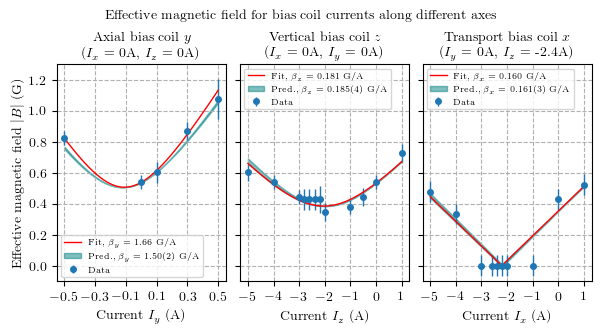

In [20]:
# now we combine all the fits into a single figure
# including the fits, the data, and the fit parameters
# we can just use the variables popt_axial, popt_vertical, popt_transport defined earlier

fig, ax = plt.subplots(1,3, sharey=True,constrained_layout=True)

# plt.subplots_adjust(wspace=0.1)
fig.suptitle('Effective magnetic field for bias coil currents along different axes', y=1.06)
# fig.supxlabel('Bias coil current along different axes (A)', y=-0.05)

ax[0].errorbar(current_axial_biascoil, axial_average_peak_freq_separation_from_centre, yerr=axial_average_peak_freq_separation_from_centre_error, fmt='o', label='Data')
ax[0].plot(np.linspace(-0.5,0.5,100), effective_bfield_function_axial(np.linspace(-0.5,0.5,100),*popt_axial), label=r'Fit, $\beta_y$ = {:.2f} G/A'.format(popt_axial[0]), color='red')
ax[0].set_xlabel('Current $I_y$ (A)')
ax[0].set_ylabel(r'Effective magnetic field $|B|$ (G)')
ax[0].set_title('Axial bias coil $y$ \n ($I_x$ = 0A, $I_z$ = 0A)')
ax[0].set_xticks(np.linspace(-0.5,0.5,6))

ax[1].errorbar(current_vertical_biascoil_axial0, vertical_average_peak_freq_separation_from_centre_axial0, yerr=vertical_average_peak_freq_separation_from_centre_error_axial0, fmt='o', label='Data')
ax[1].plot(np.linspace(-5,1,100), effective_bfield_function_vertical(np.linspace(-5,1,100),*popt_vertical), label=r'Fit, $\beta_z$ = {:.3f} G/A'.format(popt_vertical[0]), color='red')
ax[1].set_xlabel('Current $I_z$ (A)')
ax[1].set_title('Vertical bias coil $z$ \n ($I_x$ = 0A, $I_y$ = 0A)')
ax[1].set_xticks(np.linspace(-5,1,7))

ax[2].errorbar(current_transport_biascoil_axial0_verticalminus2pt4, transport_average_peak_freq_separation_from_centre_axial0_verticalminus2pt4, yerr=transport_average_peak_freq_separation_from_centre_error_axial0_verticalminus2pt4, fmt='o', label='Data')
ax[2].plot(np.linspace(-5,1,100), effective_bfield_function_transport(np.linspace(-5,1,100),*popt_transport), label=r'Fit, $\beta_x$ = {:.3f} G/A'.format(popt_transport[0]), color='red')
ax[2].set_xlabel('Current $I_x$ (A)')
ax[2].set_title('Transport bias coil $x$ \n ($I_y$ = 0A, $I_z$ = -2.4A)')
ax[2].set_xticks(np.linspace(-5,1,7))


# make sure the y axis is the same for all plots
ax[0].set_ylim(-0.1,1.3)
ax[1].set_ylim(-0.1,1.3)
ax[2].set_ylim(-0.1,1.3)

# I also have hall probe measurements that give predictions to the effective magnetic field, and i want to add another plots to all three plots with the hall probe values that i have
# I want the predicted plots to have a upper lower bound using the uncertainties in the hall probe measurements
# I will use the same function as the fits, but now with the hall probe values and their uncertainties

# hall probe values and their uncertainties
hall_probe_beta_axial = 1.50
hall_probe_beta_axial_uncertainty = 0.02
hall_probe_beta_vertical = 0.185
hall_probe_beta_vertical_uncertainty = 0.004
hall_probe_beta_transport = 0.161
hall_probe_beta_transport_uncertainty = 0.003

# now, with these values above, we can predict the effective magnetic field using the function we defined earlier
# we will use the np linspace to plot a predicted curve using the function and the hall probe values
# we want to plot the confidence interval of the hall probe values as well
hall_probe_axial_predicted_upper = effective_bfield_function_axial(np.linspace(-0.5,0.5,100),hall_probe_beta_axial+hall_probe_beta_axial_uncertainty,popt_axial[1],popt_axial[2],popt_axial[3])
hall_probe_axial_predicted_lower = effective_bfield_function_axial(np.linspace(-0.5,0.5,100),hall_probe_beta_axial-hall_probe_beta_axial_uncertainty,popt_axial[1],popt_axial[2],popt_axial[3])
hall_probe_vertical_predicted_upper = effective_bfield_function_vertical(np.linspace(-5,1,100),hall_probe_beta_vertical+hall_probe_beta_vertical_uncertainty,popt_vertical[1],popt_vertical[2])
hall_probe_vertical_predicted_lower = effective_bfield_function_vertical(np.linspace(-5,1,100),hall_probe_beta_vertical-hall_probe_beta_vertical_uncertainty,popt_vertical[1],popt_vertical[2])
hall_probe_transport_predicted_upper = effective_bfield_function_transport(np.linspace(-5,1,100),hall_probe_beta_transport+hall_probe_beta_transport_uncertainty,popt_transport[1])
hall_probe_transport_predicted_lower = effective_bfield_function_transport(np.linspace(-5,1,100),hall_probe_beta_transport-hall_probe_beta_transport_uncertainty,popt_transport[1])

# now we plot the hall probe values on the same graph as the fits and the data with a confidence interval band plot via plt.fill_between
# we will also add the hall probe values to the legend, calling it predicted
# we will just directly add the plots to the existing plots here

ax[0].fill_between(np.linspace(-0.5,0.5,100),hall_probe_axial_predicted_upper,hall_probe_axial_predicted_lower,alpha=0.5,label=r'Pred., $\beta_y$ = {:.2f}({:.0f}) G/A'.format(hall_probe_beta_axial,hall_probe_beta_axial_uncertainty*100),color='teal')
ax[1].fill_between(np.linspace(-5,1,100),hall_probe_vertical_predicted_upper,hall_probe_vertical_predicted_lower,alpha=0.5,label=r'Pred., $\beta_z$ = {:.3f}({:.0f}) G/A'.format(hall_probe_beta_vertical,hall_probe_beta_vertical_uncertainty*1000),color='teal')
ax[2].fill_between(np.linspace(-5,1,100),hall_probe_transport_predicted_upper,hall_probe_transport_predicted_lower,alpha=0.5,label=r'Pred., $\beta_x$ = {:.3f}({:.0f}) G/A'.format(hall_probe_beta_transport,hall_probe_beta_transport_uncertainty*1000),color='teal')

ax[0].legend(loc='lower left')
ax[0].grid()

ax[1].legend(loc='upper left')
ax[1].grid()

ax[2].legend(loc='upper left')
ax[2].grid()

# # separate the two plots by a bit of distance
# plt.tight_layout()
# plt.subplots_adjust(wspace=0.25)

# plt.savefig('250225 BiasCoilNbRedMOTSpectroscopyFreqVsBField_10ptFontSize_bboxinches_off.pdf',dpi=300)

# 2025/04/11 Plotting all out with better uncertainties and stuff

In [21]:
def equal_weight_average(values, uncertainties):
    """
    Calculate the average and its uncertainty with equal weightage.

    Parameters:
    values (list): List of values.
    uncertainties (list): List of corresponding uncertainties.

    Returns:
    tuple: Average and its uncertainty.
    """
    avg = sum(values) / len(values)
    avg_uncertainty = (sum(uncertainty**2 for uncertainty in uncertainties) / len(uncertainties)**2) ** 0.5
    return avg, avg_uncertainty

# Example usage
values = [0.37, 0.38, 0.35]
uncertainties = [0.0, 0.02, 0.03]
average, uncertainty = equal_weight_average(values, uncertainties)
print(f"Equal weight average: {average:.5f} ± {uncertainty:.5f}")


Equal weight average: 0.36667 ± 0.01202


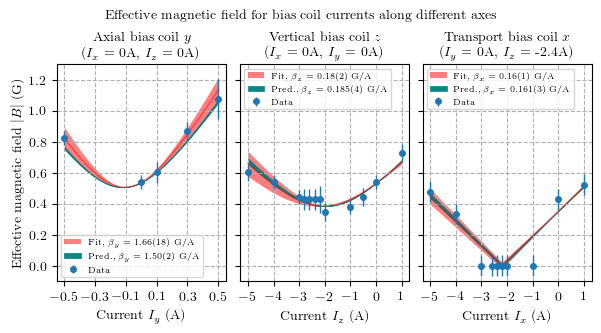

In [71]:
# now we combine all the fits into a single figure
# including the fits, the data, and the fit parameters
# we can just use the variables popt_axial, popt_vertical, popt_transport defined earlier

fig, ax = plt.subplots(1,3, sharey=True,constrained_layout=True)

# plt.subplots_adjust(wspace=0.1)
fig.suptitle('Effective magnetic field for bias coil currents along different axes', y=1.06)
# fig.supxlabel('Bias coil current along different axes (A)', y=-0.05)

beta_axial = 1.66
beta_axial_uncertainty = 0.18
beta_vertical = 0.18
beta_vertical_uncertainty = 0.02
beta_transport = 0.16
beta_transport_uncertainty = 0.01

ax[0].errorbar(current_axial_biascoil, axial_average_peak_freq_separation_from_centre, yerr=axial_average_peak_freq_separation_from_centre_error, fmt='o', label='Data')
ax[0].plot(np.linspace(-0.5,0.5,100), 
           effective_bfield_function_axial(np.linspace(-0.5,0.5,100),*popt_axial), 
        #    label=r'Fit, $\beta_y$ = {:.2f} G/A'.format(popt_axial[0]), 
           alpha=0.5,
           color='red')
ax[0].fill_between(np.linspace(-0.5,0.5,100),
                   effective_bfield_function_axial(np.linspace(-0.5,0.5,100),
                                                   beta_axial+beta_axial_uncertainty,
                                                   popt_axial[1],
                                                   popt_axial[2],
                                                   popt_axial[3]),
                    effective_bfield_function_axial(np.linspace(-0.5,0.5,100),
                                                    beta_axial-beta_axial_uncertainty,
                                                    popt_axial[1],
                                                    popt_axial[2],
                                                    popt_axial[3]),
                    alpha=0.5,
                    linewidth=0,          # Ensures no edge
                    label=r'Fit, $\beta_y$ = {:.2f}({:.0f}) G/A'.format(beta_axial,beta_axial_uncertainty*100),
                    color='red')
ax[0].set_xlabel('Current $I_y$ (A)')
ax[0].set_ylabel(r'Effective magnetic field $|B|$ (G)')
ax[0].set_title('Axial bias coil $y$ \n ($I_x$ = 0A, $I_z$ = 0A)')
ax[0].set_xticks(np.linspace(-0.5,0.5,6))

ax[1].errorbar(current_vertical_biascoil_axial0, vertical_average_peak_freq_separation_from_centre_axial0, yerr=vertical_average_peak_freq_separation_from_centre_error_axial0, fmt='o', label='Data')
ax[1].plot(np.linspace(-5,1,100), 
           effective_bfield_function_vertical(np.linspace(-5,1,100),*popt_vertical), 
        #    label=r'Fit, $\beta_z$ = {:.3f} G/A'.format(popt_vertical[0]), 
           alpha=0.5,
           color='red')
ax[1].fill_between(np.linspace(-5,1,100),
                     effective_bfield_function_vertical(np.linspace(-5,1,100),
                                                         beta_vertical+beta_vertical_uncertainty,
                                                         popt_vertical[1],
                                                         popt_vertical[2]),
                      effective_bfield_function_vertical(np.linspace(-5,1,100),
                                                         beta_vertical-beta_vertical_uncertainty,
                                                         popt_vertical[1],
                                                         popt_vertical[2]),
                      alpha=0.5,
                      linewidth=0,          # Ensures no edge
                      label=r'Fit, $\beta_z$ = {:.2f}({:.0f}) G/A'.format(beta_vertical,beta_vertical_uncertainty*100),
                      color='red')
ax[1].set_xlabel('Current $I_z$ (A)')
ax[1].set_title('Vertical bias coil $z$ \n ($I_x$ = 0A, $I_y$ = 0A)')
ax[1].set_xticks(np.linspace(-5,1,7))

ax[2].errorbar(current_transport_biascoil_axial0_verticalminus2pt4, transport_average_peak_freq_separation_from_centre_axial0_verticalminus2pt4, yerr=transport_average_peak_freq_separation_from_centre_error_axial0_verticalminus2pt4, fmt='o', label='Data')
ax[2].plot(np.linspace(-5,1,100), 
           effective_bfield_function_transport(np.linspace(-5,1,100),*popt_transport), 
        #    label=r'Fit, $\beta_x$ = {:.3f} G/A'.format(popt_transport[0]), 
           alpha=0.5,
           color='red')
ax[2].fill_between(np.linspace(-5,1,100),
                     effective_bfield_function_transport(np.linspace(-5,1,100),
                                                         beta_transport+beta_transport_uncertainty,
                                                         popt_transport[1]),
                      effective_bfield_function_transport(np.linspace(-5,1,100),
                                                          beta_transport-beta_transport_uncertainty,
                                                          popt_transport[1]),
                      alpha=0.5,
                      linewidth=0,          # Ensures no edge
                      label=r'Fit, $\beta_x$ = {:.2f}({:.0f}) G/A'.format(beta_transport,beta_transport_uncertainty*100),
                      color='red')
ax[2].set_xlabel('Current $I_x$ (A)')
ax[2].set_title('Transport bias coil $x$ \n ($I_y$ = 0A, $I_z$ = -2.4A)')
ax[2].set_xticks(np.linspace(-5,1,7))


# make sure the y axis is the same for all plots
ax[0].set_ylim(-0.1,1.3)
ax[1].set_ylim(-0.1,1.3)
ax[2].set_ylim(-0.1,1.3)

# I also have hall probe measurements that give predictions to the effective magnetic field, and i want to add another plots to all three plots with the hall probe values that i have
# I want the predicted plots to have a upper lower bound using the uncertainties in the hall probe measurements
# I will use the same function as the fits, but now with the hall probe values and their uncertainties

# hall probe values and their uncertainties
hall_probe_beta_axial = 1.50
hall_probe_beta_axial_uncertainty = 0.02
hall_probe_beta_vertical = 0.185
hall_probe_beta_vertical_uncertainty = 0.004
hall_probe_beta_transport = 0.161
hall_probe_beta_transport_uncertainty = 0.003

# now, with these values above, we can predict the effective magnetic field using the function we defined earlier
# we will use the np linspace to plot a predicted curve using the function and the hall probe values
# we want to plot the confidence interval of the hall probe values as well
hall_probe_axial_predicted_upper = effective_bfield_function_axial(np.linspace(-0.5,0.5,100),hall_probe_beta_axial+hall_probe_beta_axial_uncertainty,popt_axial[1],popt_axial[2],popt_axial[3])
hall_probe_axial_predicted_lower = effective_bfield_function_axial(np.linspace(-0.5,0.5,100),hall_probe_beta_axial-hall_probe_beta_axial_uncertainty,popt_axial[1],popt_axial[2],popt_axial[3])
hall_probe_vertical_predicted_upper = effective_bfield_function_vertical(np.linspace(-5,1,100),hall_probe_beta_vertical+hall_probe_beta_vertical_uncertainty,popt_vertical[1],popt_vertical[2])
hall_probe_vertical_predicted_lower = effective_bfield_function_vertical(np.linspace(-5,1,100),hall_probe_beta_vertical-hall_probe_beta_vertical_uncertainty,popt_vertical[1],popt_vertical[2])
hall_probe_transport_predicted_upper = effective_bfield_function_transport(np.linspace(-5,1,100),hall_probe_beta_transport+hall_probe_beta_transport_uncertainty,popt_transport[1])
hall_probe_transport_predicted_lower = effective_bfield_function_transport(np.linspace(-5,1,100),hall_probe_beta_transport-hall_probe_beta_transport_uncertainty,popt_transport[1])

# now we plot the hall probe values on the same graph as the fits and the data with a confidence interval band plot via plt.fill_between
# we will also add the hall probe values to the legend, calling it predicted
# we will just directly add the plots to the existing plots here

ax[0].fill_between(np.linspace(-0.5,0.5,100),hall_probe_axial_predicted_upper,hall_probe_axial_predicted_lower,alpha=0.95,label=r'Pred., $\beta_y$ = {:.2f}({:.0f}) G/A'.format(hall_probe_beta_axial,hall_probe_beta_axial_uncertainty*100),color='teal'
                   ,linewidth=0.5
                   )
ax[1].fill_between(np.linspace(-5,1,100),hall_probe_vertical_predicted_upper,hall_probe_vertical_predicted_lower,alpha=0.95,label=r'Pred., $\beta_z$ = {:.3f}({:.0f}) G/A'.format(hall_probe_beta_vertical,hall_probe_beta_vertical_uncertainty*1000),color='teal'
                   ,linewidth=0.5
                   )
ax[2].fill_between(np.linspace(-5,1,100),hall_probe_transport_predicted_upper,hall_probe_transport_predicted_lower,alpha=0.95,label=r'Pred., $\beta_x$ = {:.3f}({:.0f}) G/A'.format(hall_probe_beta_transport,hall_probe_beta_transport_uncertainty*1000),color='teal'
                   ,linewidth=0.5
                   )

ax[0].legend(loc='lower left')
ax[0].grid()

ax[1].legend(loc='upper left')
ax[1].grid()

ax[2].legend(loc='upper left')
ax[2].grid()

# # separate the two plots by a bit of distance
# plt.tight_layout()
# plt.subplots_adjust(wspace=0.25)

plt.savefig('250411 BiasCoilNbRedMOTSpectroscopyFreqVsBField.pdf',dpi=300)